In [1]:
import sys
import os
path_pipest = os.path.abspath('./')
n=0
while (not os.path.basename(path_pipest)=='pipest') and (n<4):
    path_pipest=os.path.dirname(path_pipest)
    n+=1 
if not os.path.basename(path_pipest)=='pipest':
    print("path_pipest not found. Instead: {}".format(path_pipest))
    raise ValueError("path_pipest not found.")
path_models=path_pipest+'/models'    
path_sdhawkes=path_pipest+'/sdhawkes'
path_modelling = path_sdhawkes+'/modelling'
path_resources = path_sdhawkes+'/resources'
path_impact=path_pipest+'/impact'
path_lobster=path_pipest+'/lobster'
path_lobster_data=path_lobster+'/data'
path_lobster_pyscripts=path_lobster+'/py_scripts'
path_tests = path_pipest+'/tests'
path_saved_tests = path_tests+'/saved_tests'
path_perfmeas=path_tests+'/performance_measurements'
sys.path.append(path_modelling)
sys.path.append(path_resources)
sys.path.append(path_perfmeas)
import numpy as np
import pandas as pd
import glob
import pickle
import datetime
import time
import datetime
import timeit
import model as sd_hawkes_model
import computation
import plot_tools

openmp.omp_get_max_threads(): 4


In [2]:
import matplotlib.pyplot as plt

In [3]:
symbol="INTC"
date="2019-01-23"
time_window="37800-41400"

In [4]:
with open(path_impact+"/models/{}/{}_{}_{}/{}_sdhawkes_{}_{}"
          .format(symbol, symbol, date, time_window, symbol, date, time_window), 'rb') as source:
    model=pickle.load(source)

In [5]:
model.set_transition_probabilities(model.transition_probabilities)

Transition probabilities have been set. Price Asymmetry = 0.011328171941603639


In [ ]:
model.goodness_of_fit.qq_plot_residuals()

In [ ]:
# model.store_history_of_intensities(density_of_eval_points=1000)

In [ ]:
model.plot_events_and_states(t_0=28.5,t_1=45.0)

In [ ]:
model.plot_events_and_states()

In [ ]:
model.plot_intensities()

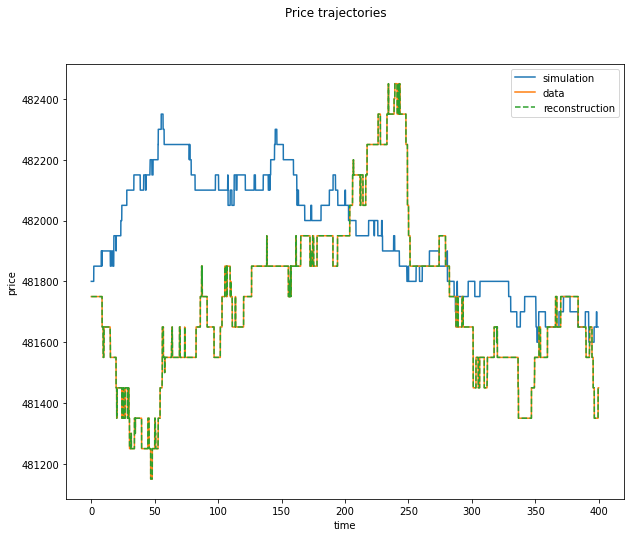

[0.15129782 0.15129782 6.8080945  6.8080945 ]


In [9]:
model.plot_price_trajectories(t0=-100.0, t1=400.0)
print(model.base_rates)

In [ ]:
# model.goodness_of_fit.qq_plot_residuals()

In [ ]:
print(len(model.simulated_times))

In [ ]:
def sigma_E(e):
    return 2*(e//2)+1-e%2
def sigma_S(x):
    return model.number_of_states-1-x

In [ ]:
y=11
e=2
# x=14
phi=model.transition_probabilities
for x in model.state_enc.inflationary_states:
    print(phi[y,e,x])
for x in model.state_enc.deflationary_states:
    print(phi[y,e,x])
# print(phi[y,sigma_E(e),sigma_S(x)])

In [ ]:
stop here


# Liquidation

In [ ]:
initial_condition_times=np.array(model.simulated_times,copy=True)
initial_condition_events=1+np.array(model.simulated_events,copy=True)
initial_condition_states=np.array(model.simulated_states,copy=True)
initial_condition_volumes=np.array(model.simulated_volume,copy=True)

In [ ]:
model.base_rates

In [ ]:
initial_inventory=4.0
liquidator_base_rate=0.150
type_of_liquid = 'with_the_market' #constant_intensity or with_the_market or against_the_market
liquidator_control_type='fraction_of_bid_side' # fraction_of_inventory or fraction_of_bid_side
liquidator_control=0.2
time_start=float(initial_condition_times[-1])
time_end=time_start+0.05*60*60

In [ ]:
model.setup_liquidator(initial_inventory=initial_inventory,
                       time_start=time_start,
                       liquidator_base_rate=liquidator_base_rate,
                       type_of_liquid=type_of_liquid,
                       liquidator_control_type=liquidator_control_type,
                       liquidator_control=liquidator_control)

In [ ]:
model.liquidator.print_info()

In [ ]:
model.simulate_liquidation(
    time_end,
    initial_condition_events=initial_condition_events,
    initial_condition_states=initial_condition_states,
    initial_condition_times=initial_condition_times,
    initial_condition_volumes=initial_condition_volumes,
    verbose=False,
    report_history_of_intensities = False,
    store_results=True
)

In [ ]:
model.liquidator.print_info()

In [ ]:
model.make_start_liquid_origin_of_times(delete_negative_times=False)

In [ ]:
model.create_impact_profile(delete_negative_times=False,
                            produce_weakly_defl_pp=False,
                            maxiter=10, num_init_guesses=1)

In [ ]:
model.liquidator.impact.store_bm_impact()

In [ ]:
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

In [ ]:
model.store_history_of_intensities()

In [ ]:
model.plot_bm_impact_profile(time_start=-5.0, time_end=60.0, plot_bm_intensity=True)

In [ ]:
model.plot_events_and_states(t_0=-5.5,t_1=150.0, first_event_index=0)

In [ ]:
model.plot_price_trajectories(T=750.0)